# Website Traffic Forecasting

<img src='website-traffic.jpg'>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Thecleverprogrammer.csv")

In [11]:
df.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [13]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [17]:
df.head()

,Date,Views
0,2021-06-01,7831
1,2021-06-02,7798
2,2021-06-03,7401
3,2021-06-04,7054
4,2021-06-05,7973


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


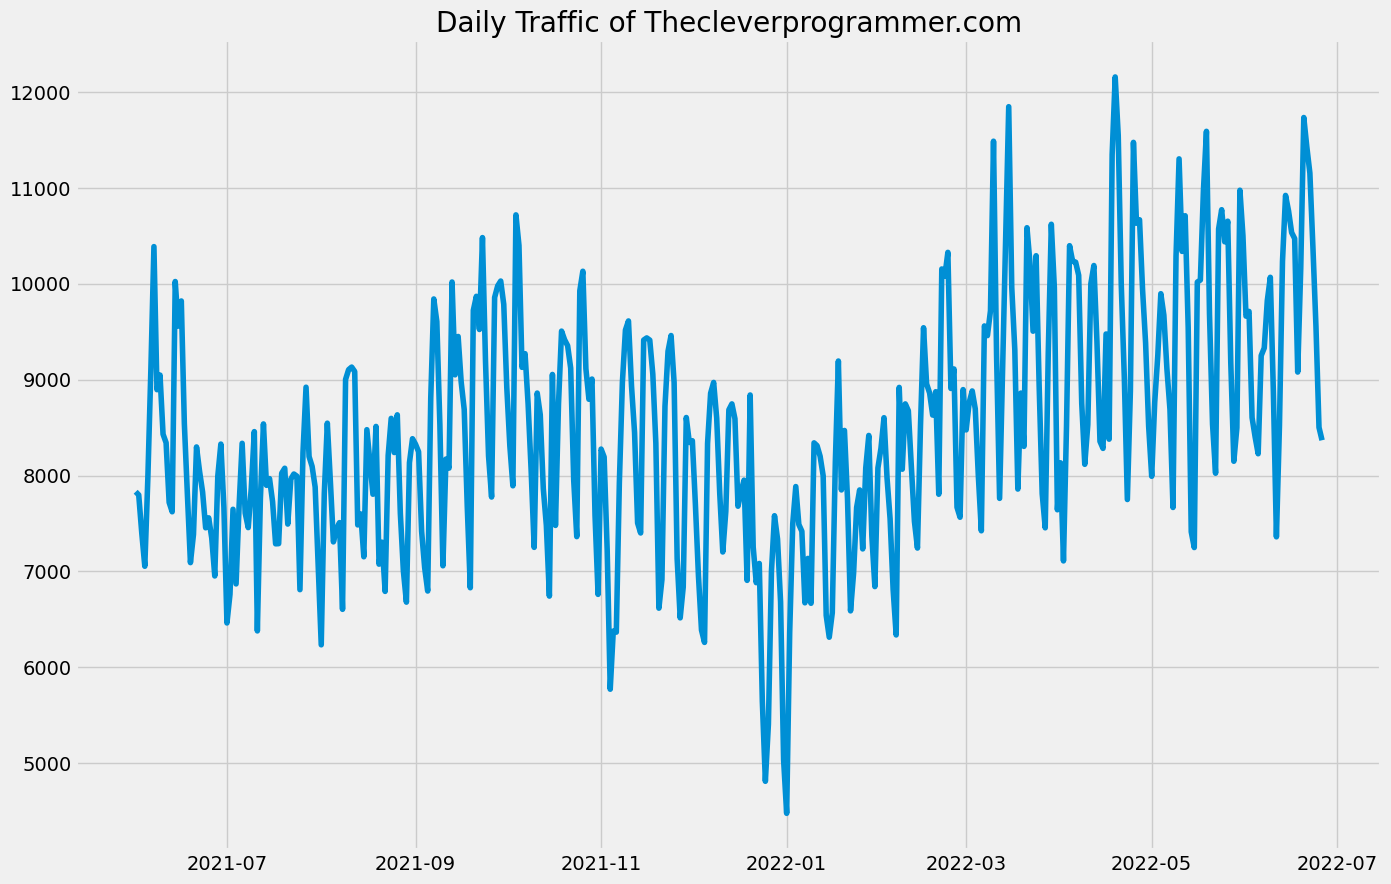

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(df["Date"], df["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 640x480 with 0 Axes>

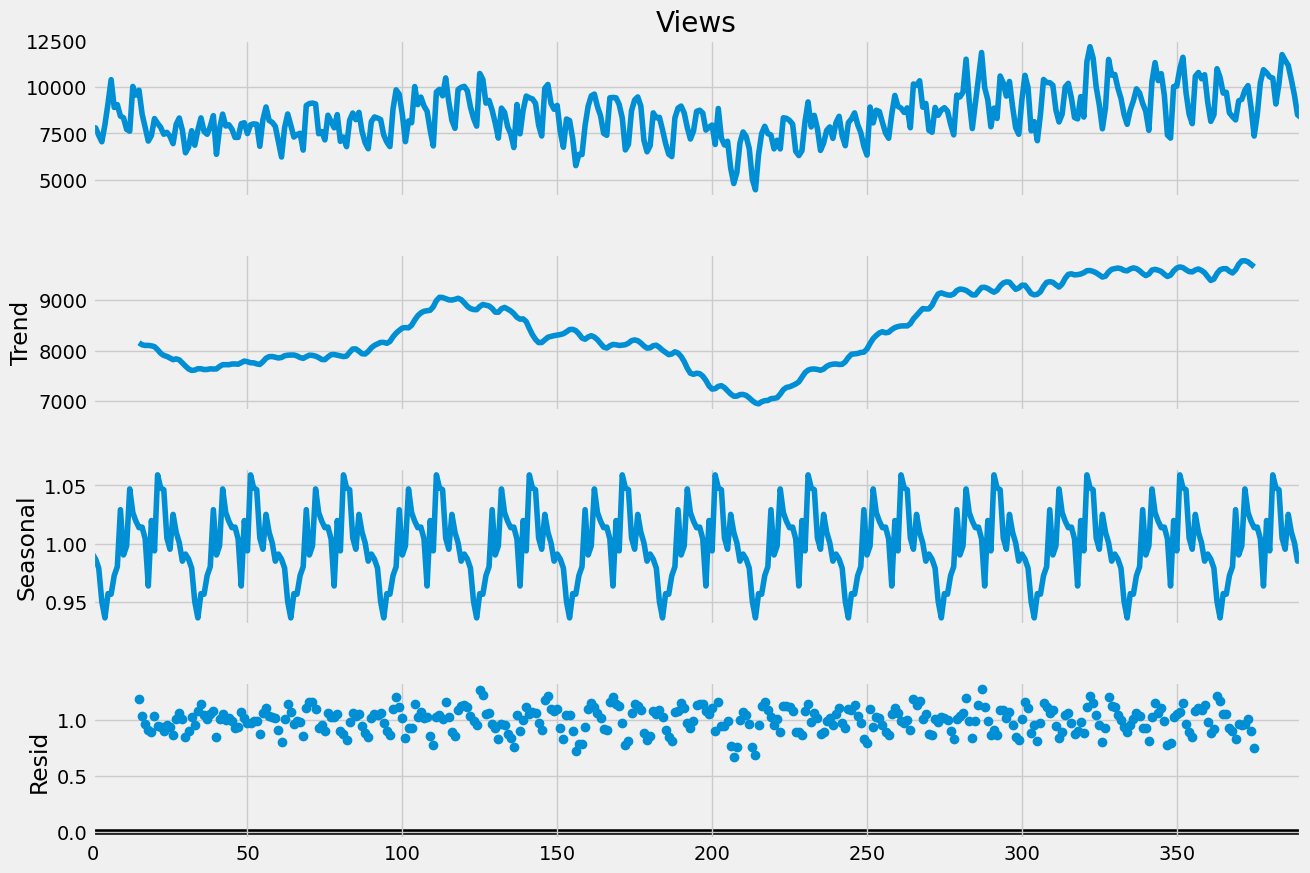

In [30]:
result = seasonal_decompose(df["Views"], model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

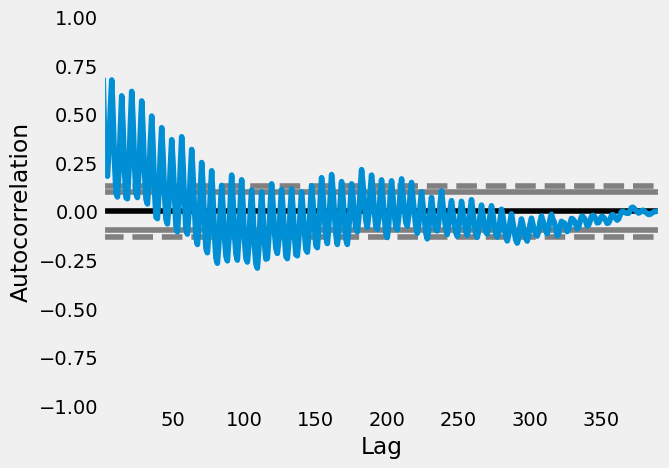

In [32]:
pd.plotting.autocorrelation_plot(df["Views"])

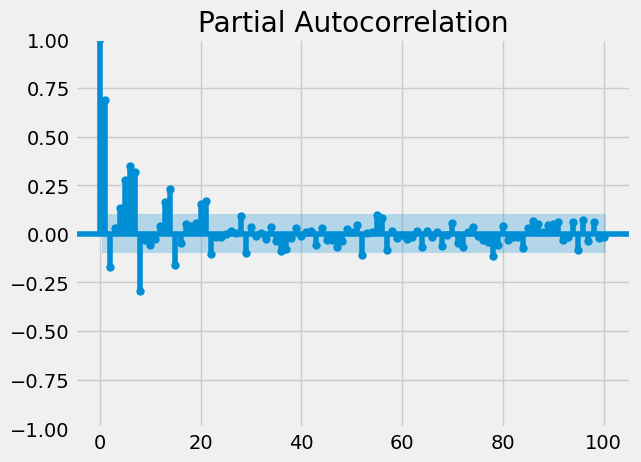

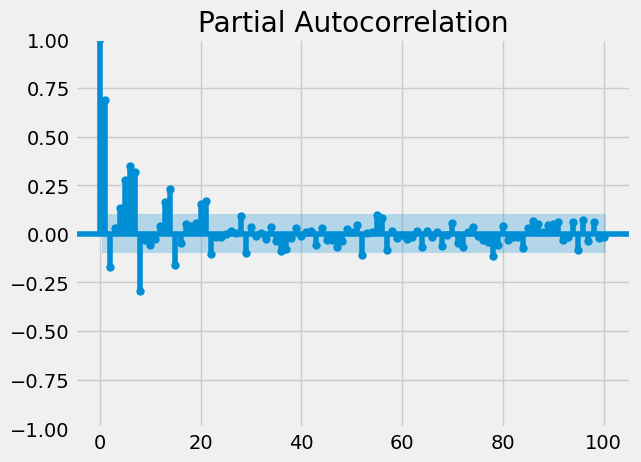

In [34]:
plot_pacf(df["Views"], lags = 100)

In [56]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [66]:
df['Views_diff'] = df['Views'].diff()
df.dropna(inplace=True)

In [68]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Views'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.7765943868869323
p-value: 0.3921422718669221


In [70]:
p, d, q = 1, 1, 1  # Daha basit bir model ile başlamak
seasonal_order = (1, 1, 1, 12)  # Sezonel parametreler


In [72]:
model = sm.tsa.statespace.SARIMAX(df['Views_diff'].dropna(), 
                                    order=(p, d, q), 
                                    seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)  # disp=False ile hata mesajlarını gizleyebilirsiniz

C:\Users\P53\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\P53\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\P53\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\P53\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P53\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


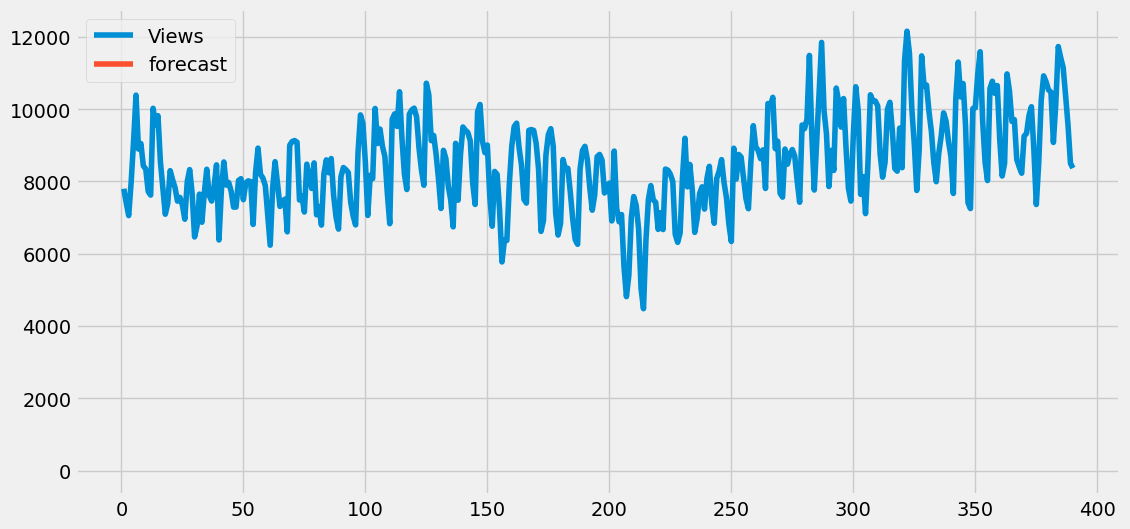

In [74]:
df['forecast'] = model_fit.predict(start=len(df), end=len(df) + 11)  # Son 12 ay için tahmin
df[['Views', 'forecast']].plot(figsize=(12, 6))
plt.show()
